In [9]:
# from smooth import sieve_to, is_prime, factorize, is_smooth
from bisect import bisect_left, bisect_right
import time
from math import log, ceil, exp, pi
from decimal import Decimal, getcontext
import math
import struct
from sympy import Ei

In [13]:
t1 = time.time()
primes = sieve_to(1_000_000)
t2 = time.time()
t2 - t1

0.0298159122467041

In [ ]:
def isSmooth(x, y):
    if x <= y:
        return True
    if is_prime(x):
        return False
    idx = bisect_left(primes, y)
    for p in primes[:idx+1]:
        if x <= y:
            return True
        if is_prime(x):
            return False
        while x % p == 0:
            x //= p
    return x == 1

In [11]:
with open("smooth/dickman_table.bin", 'rb') as f:
    N, = struct.unpack('<I', f.read(4))
    data = f.read(16 * N)
vals = struct.unpack('<' + 'dd' * N, data)
U_LIST = list(vals[0::2])
LOG_RHO_LIST = list(vals[1::2])

In [12]:
def dickmanRho(u):
    if 0 <= u <= 1:
        return 1
    if 1 < u <= 2:
        return 1.0 - log(u)
    if 2 < u < 20:
        idx = bisect_right(U_LIST, u) - 1

        u0, u1 = U_LIST[idx], U_LIST[idx + 1]
        y0, y1 = LOG_RHO_LIST[idx], LOG_RHO_LIST[idx + 1]
        h = u1 - u0

        if idx > 0:
            up, yp = U_LIST[idx - 1], LOG_RHO_LIST[idx - 1]
            d0 = (y1 - yp) / (u1 - up)
        else:
            d0 = (y1 - y0) / h
        if idx + 2 < len(U_LIST):
            un, yn = U_LIST[idx + 2], LOG_RHO_LIST[idx + 2]
            d1 = (yn - y0) / (un - u0)
        else:
            d1 = (y1 - y0) / h

        t = (u - u0) / h
        t2 = t*t
        t3 = t2*t
        h00 = 2*t3 - 3*t2 + 1
        h10 = t3 - 2*t2 + t
        h01 = -2*t3 + 3*t2
        h11 = t3 - t2

        log_rho = h00 * y0 + h10 * h * d0 + h01 * y1 + h11 * h * d1
        return log_rho
        return exp(log_rho)
    
    xi = log(u) + log(log(u))
    for _ in range(5):
        ex = exp(xi)
        xi -= (ex - 1.0 - u*xi) / (ex - u)

    Ei_val = float(Ei(xi))  

    log_rho = Ei_val - u*xi - log(xi) - 0.5*log(2*math.pi*u)
    return log_rho
    return exp(log_rho)

    

In [13]:
t1 = time.time()
print(dickmanRho(2.5))
print(time.time() - t1)
print(dickmanRho(3))
print(time.time() - t1)
print(dickmanRho(4))
print(time.time() - t1)
print(dickmanRho(5))
print(time.time() - t1)
print(dickmanRho(10))
print(time.time() - t1)

-2.03776567691409
0.005837202072143555
-3.02395916433476
0.0065343379974365234
-5.316292831943211
0.006620168685913086
-7.9441685609691115
0.0066890716552734375
-24.309526669379235
0.006753206253051758


In [14]:
print(dickmanRho(21))
print(dickmanRho(25.5))
print(dickmanRho(30))
print(dickmanRho(40))

-70.5581336907382
-91.8128407318432
-114.049292102886
-166.266326676466


In [25]:
U = [float(i/100.0) for i in range(5000)]
data = [(dickman_rho(u), dickmanRho(u)) for u in U]
errors = [float(abs(tup[1] - tup[0]) / tup[0]) for tup in data]

In [19]:
errors

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Finished concat.
Graphing...
0.045 49.945 0.0 0.10824630537292533


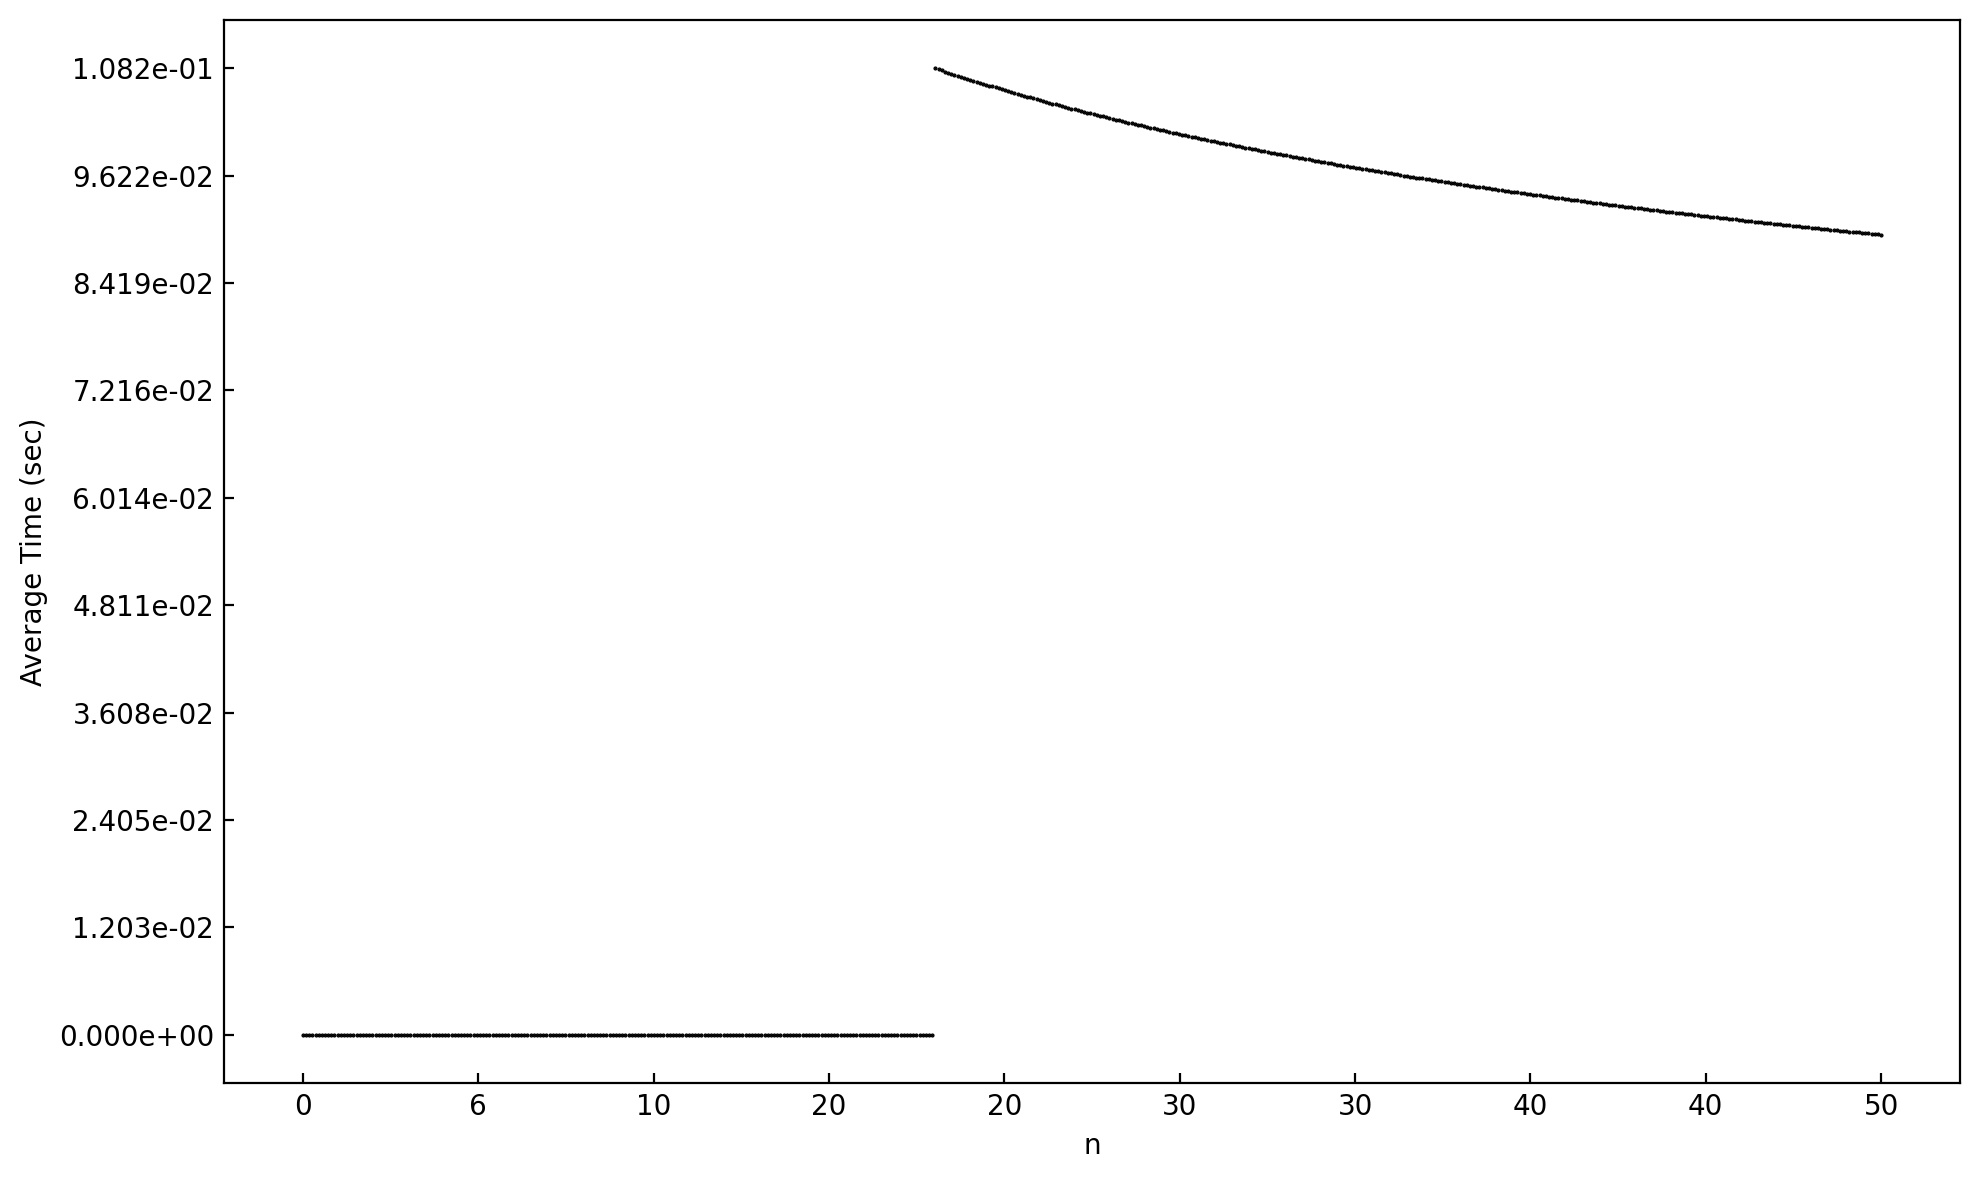

In [26]:
from testTools import graph_complexity
graph_complexity(errors, U, dpts=int(500), log=False)

In [20]:
x = "39210390210094201"
y = -11.32902
print(int(x) * exp(y))
print(log(int(x)))

471270540942.60846
38.20771816296582
